In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

sns.set_style("whitegrid")

# Previsão do tempo

### Carregar os dados

In [2]:
df = pd.read_csv('../data/precipitação.csv')
df.head()

,Data,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),"VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),CHOVEU
0,2023-03-29,69.2,1006.304545,1006.522727,1006.095455,27.263636,27.754545,26.863636,6.290909,2.759091,23.890909,23.422727,1
1,2023-04-09,51.0,1006.087500,1006.337500,1005.866667,27.104167,27.500000,26.670833,5.691667,2.625000,24.079167,23.508333,1
2,2023-04-07,48.2,1005.041667,1005.300000,1004.779167,26.220833,26.795833,25.779167,6.183333,2.804167,23.775000,23.304167,1
3,2023-03-03,47.8,1006.433333,1006.729167,1006.154167,26.320833,26.645833,26.000000,7.354167,3.500000,23.841667,23.583333,1
4,2023-06-15,40.4,1008.329167,1008.612500,1008.066667,25.079167,25.687500,24.575000,6.820833,2.533333,23.583333,23.191667,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   274 non-null    object 
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       274 non-null    float64
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  274 non-null    float64
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        274 non-null    float64
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       274 non-null    float64
 5   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           274 non-null    float64
 6   TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)             274 non-null    float64
 7   TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)             274 non-null    float64
 8   VENTO, RAJADA MAXIMA (m/s)                        

Vimos que nos dados não possuem valores faltantes

### Renomear Colunas

In [4]:

columns_to_rename = {
    'Data': 'date',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'total_precipitation_hourly_mm',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'atmospheric_pressure_station_level_hourly_mb',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'atmospheric_pressure_max_hourly_mb',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'atmospheric_pressure_min_hourly_mb',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'air_temperature_dry_bulb_hourly_celsius',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)': 'air_temperature_max_hourly_celsius',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)': 'air_temperature_min_hourly_celsius',
    'VENTO, RAJADA MAXIMA (m/s)': 'wind_gust_max_hourly_ms',
    'VENTO, VELOCIDADE HORARIA (m/s)': 'wind_speed_hourly_ms',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'dew_point_temperature_celsius',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)': 'dew_point_temperature_min_hourly_celsius',
    'CHOVEU': 'rained'
}

df.rename(columns=columns_to_rename, inplace=True)

### Verificar correlação das características com Heatmap

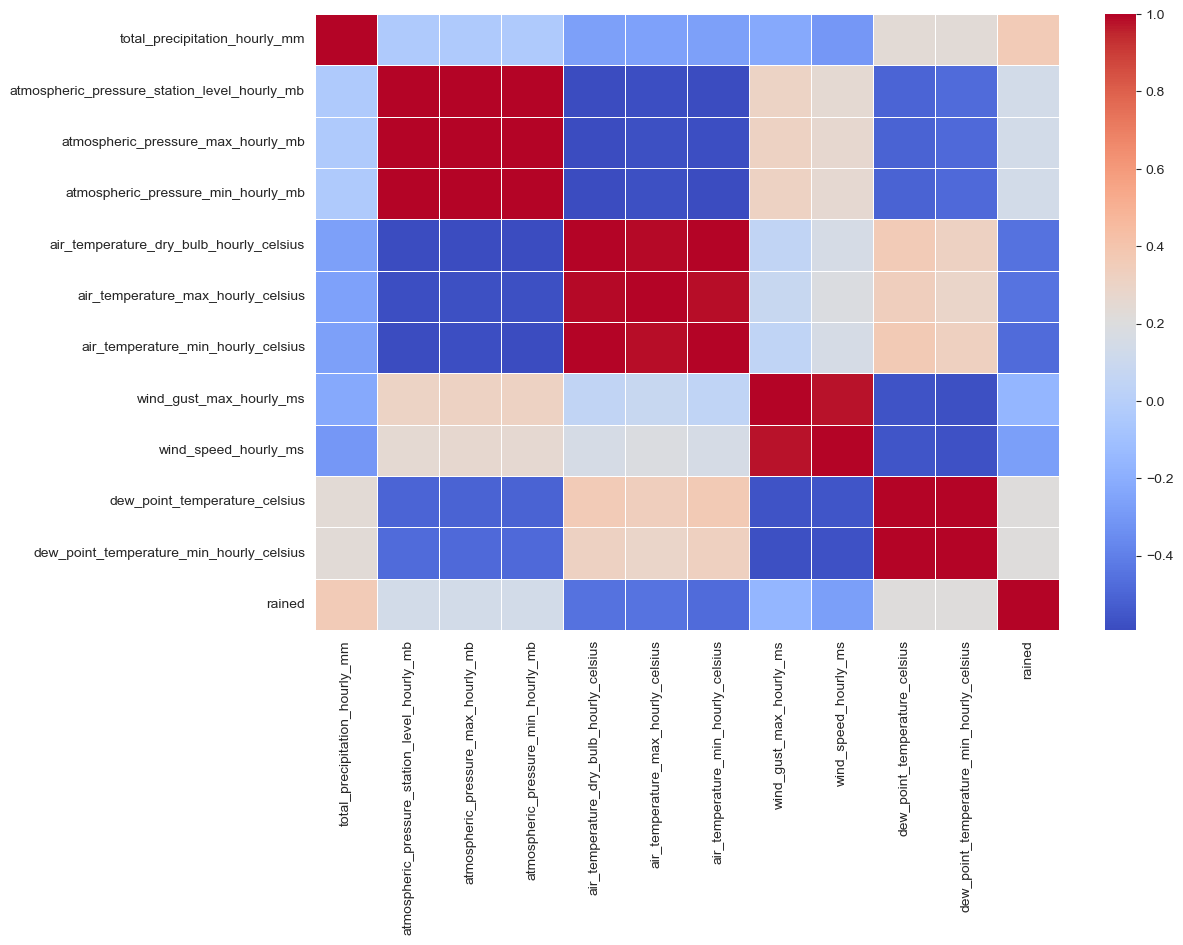

In [5]:
corr = df.drop(columns='date').corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

Ao analisar, percebemos que algumas colunas apresentam alta correlação entre si. Dado que essa relação é explicativa, decidimos removê-las para evitar redundâncias.

In [6]:
columns_to_remove = ['date', 'atmospheric_pressure_max_hourly_mb', 'atmospheric_pressure_min_hourly_mb',
                     'air_temperature_max_hourly_celsius', 'air_temperature_min_hourly_celsius',
                     'wind_gust_max_hourly_ms', 'dew_point_temperature_min_hourly_celsius']

df = df.drop(columns=columns_to_remove)
df.head()

,total_precipitation_hourly_mm,atmospheric_pressure_station_level_hourly_mb,air_temperature_dry_bulb_hourly_celsius,wind_speed_hourly_ms,dew_point_temperature_celsius,rained
0,69.2,1006.304545,27.263636,2.759091,23.890909,1
1,51.0,1006.087500,27.104167,2.625000,24.079167,1
2,48.2,1005.041667,26.220833,2.804167,23.775000,1
3,47.8,1006.433333,26.320833,3.500000,23.841667,1
4,40.4,1008.329167,25.079167,2.533333,23.583333,1


### Verificar outliers

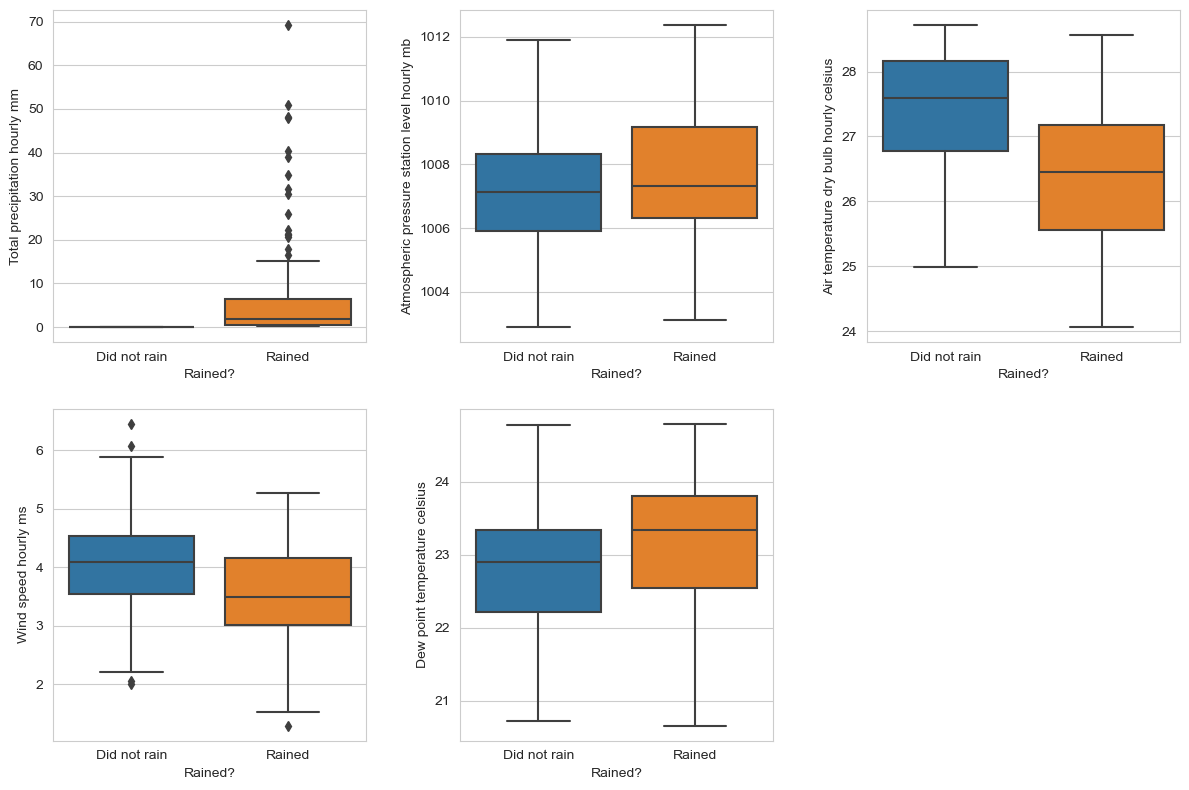

In [7]:
fig = plt.figure(figsize=(12, 8))

for i, column in enumerate(df.columns.drop(['rained'])):
    ax = fig.add_subplot(2, 3, i+1)
    sns.boxplot(ax=ax, data=df, x='rained', y=column)
    ax.set_ylabel(column.capitalize().replace('_', ' '))
    ax.set_xlabel('Rained?')
    ax.set_xticklabels(['Did not rain', 'Rained'])
    
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.3)

Vimos que apenas a coluna `PRECIPITAÇÃO TOTAL, HORÁRIO (mm)` possui outliers para o caso de choveu. Como há outliers apenas para o caso de choveu, não deve afetar o resultado, portanto não trataremos.

### Verificar balançamento dos dados

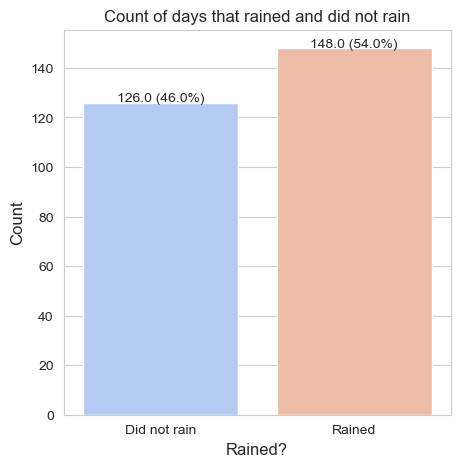

In [8]:
def plot_countplot(df):
    plt.figure(figsize=(5, 5))

    sns.countplot(data=df, x='rained', palette='coolwarm')
    plt.title('Count of days that rained and did not rain')
    plt.xlabel('Rained?', size=12)
    plt.ylabel('Count', size=12)
    plt.xticks([0, 1], ['Did not rain', 'Rained'])

    for i in range(2):
        percent = df['rained'].value_counts(normalize=True)[i] * 100
        value = df['rained'].value_counts()[i]
        plt.text(i, value + 0.5, f'{value:.1f} ({percent:.1f}%)', ha='center')
    
    plt.show()
    
plot_countplot(df)

Ao analisar, observamos que os dados não apresentam um alto nível de desequilíbrio entre as classes.

### Pre-procesamento

In [9]:
# Split in features and target
X, y = df.drop(columns='rained'), df['rained']

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((219, 5), (55, 5), (219,), (55,))

### Seleção de features

In [10]:
models = [KNeighborsClassifier(), SVC(), LogisticRegression(), RandomForestClassifier()]

params_grids = [
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    {'max_iter': [100, 200], 'C': [0.1, 1, 10]},
    {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
]

for model, param_grid in zip(models, params_grids):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Melhores Parâmetros {model.__class__.__name__}:", grid_search.best_params_)

Melhores Parâmetros KNeighborsClassifier: {'n_neighbors': 3, 'weights': 'uniform'}
Melhores Parâmetros SVC: {'C': 10, 'kernel': 'linear'}
Melhores Parâmetros LogisticRegression: {'C': 10, 'max_iter': 100}
Melhores Parâmetros RandomForestClassifier: {'max_depth': 3, 'n_estimators': 50}


### Treinamento e avaliação dos modelos

##### Modelos individuais

In [11]:
# Create models
knn = KNeighborsClassifier(n_neighbors=3, weights="uniform")
svc = SVC(C=10, kernel="rbf")
lr = LogisticRegression(C=10, max_iter=100)
rf = RandomForestClassifier(max_depth=3, n_estimators=50)

models_name = [model.__class__.__name__ for model in [knn, svc, rf, lr]]
accuracies = []
precisions = []
recalls = []
f1s = []

for model in [knn, svc, lr, rf]:
    # Train models
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    for metric, score in zip([accuracy_score, precision_score, recall_score, f1_score],
                             [accuracies, precisions, recalls, f1s]):
        score.append(metric(y_test, y_pred))
    
metrics = pd.DataFrame({'model': models_name, 'accuracy': accuracies, 'precision': precisions,
                        'recall': recalls,'f1': f1s})

metrics

,model,accuracy,precision,recall,f1
0,KNeighborsClassifier,0.763636,0.785714,0.758621,0.771930
1,SVC,0.890909,0.960000,0.827586,0.888889
2,RandomForestClassifier,0.927273,1.000000,0.862069,0.925926
3,LogisticRegression,1.000000,1.000000,1.000000,1.000000


Ao analisar os resultados dos classificadores individuais, observamos que o modelo `LogisticRegression` apresentou o melhor desempenho, alcançando 100% de `accuracy`, `precision`, `recall` e `F1`. Em segundo lugar, o modelo `RandomForest` obteve 92% de `accuracy`, 100% de `precision`, 86% de `recall` e 92% de `F1`, respectivamente.

##### Comitê de classificadores

In [12]:
ensemble_classifier = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=3, weights="uniform")),
    ('svc', SVC(C=10, kernel="rbf", probability=True)), 
    ('rf', RandomForestClassifier(max_depth=3, n_estimators=50)),
], voting='hard')

# Trains the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predicts the test data
ensemble_predictions = ensemble_classifier.predict(X_test)

# Evaluates the ensemble classifier
for metric, score in zip([accuracy_score, precision_score, recall_score, f1_score],
                         [accuracies, precisions, recalls, f1s]):
    score.append(metric(y_test, ensemble_predictions))
models_name.append('ensemble')

metrics = pd.DataFrame({'model': models_name, 'accuracy': accuracies, 'precision': precisions,
                        'recall': recalls,'f1': f1s})

metrics

,model,accuracy,precision,recall,f1
0,KNeighborsClassifier,0.763636,0.785714,0.758621,0.771930
1,SVC,0.890909,0.960000,0.827586,0.888889
2,RandomForestClassifier,0.927273,1.000000,0.862069,0.925926
3,LogisticRegression,1.000000,1.000000,1.000000,1.000000
4,ensemble,0.909091,1.000000,0.827586,0.905660


Ao analisar o comitê de classificadores, notamos que não houve qualquer melhoria significativa. Optamos por remover o modelo LogisticRegression, uma vez que alcançou uma performance de 100% individualmente.